### ALL

In [73]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/all_cluster_vt_gt_0.csv')
# df2 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/sep_cluster.csv')

In [75]:
# df1.shape

In [76]:
# df2.shape

In [77]:
# df = pd.concat([df1,df2])

In [78]:
# df = df2

In [79]:
# df.shape

In [80]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,...,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains,unshorten url
0,0,171,amzn.to,https://amzn.to/2vawbWK,83,2,0,2280.0,67.199.248.12,Server,...,N,53,0,1,0,1,N,1,1,https://www.amazon.com/gp/product/?tag=calcula...
1,1,220,lnkd.in,https://lnkd.in/eFHFaRi,83,1,0,42685.0,108.174.10.10,NaN,...,N,69,0,0,0,1,N,0,1,https://www.linkedin.com/feed/update/urn:li:sh...
2,2,348,tinyurl.com,http://tinyurl.com/yxnnpj7f,83,1,0,130473.0,104.20.138.65,nginx/1.16.1,...,N,96,0,0,0,0,N,9,0,http://tatar-congress.org/ru/yanalyklar/video-...
3,3,481,arsitios.com,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,191720.0,104.31.70.181,cloudflare,...,N,117,0,0,0,0,N,12,0,https://arsitios.com/zonafrancatv/2020/08/17/v...
4,4,524,tinyurl.com,https://tinyurl.com/yyztkhl6,83,1,0,39174.0,104.20.138.65,Apache,...,N,130,0,0,0,0,N,13,1,http://guiaglobal.com.br/2020/08/17/imunologis...


In [81]:
import tldextract

tldextract.extract('google.com')

ExtractResult(subdomain='', domain='google', suffix='com')

In [82]:
import tldextract
def getFQDN(url):
    URL = tldextract.extract(url)
#     if URL.subdomain!='':
#         return '{}.{}.{}'.format(URL.subdomain,URL.domain,URL.suffix)
    return '{}.{}'.format(URL.domain,URL.suffix)

In [83]:
df

,Unnamed: 0,Unnamed: 0.1,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,...,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains,unshorten url
0,0,171,amzn.to,https://amzn.to/2vawbWK,83,2,0,2280.0,67.199.248.12,Server,...,N,53,0,1,0,1,N,1,1,https://www.amazon.com/gp/product/?tag=calcula...
1,1,220,lnkd.in,https://lnkd.in/eFHFaRi,83,1,0,42685.0,108.174.10.10,NaN,...,N,69,0,0,0,1,N,0,1,https://www.linkedin.com/feed/update/urn:li:sh...
2,2,348,tinyurl.com,http://tinyurl.com/yxnnpj7f,83,1,0,130473.0,104.20.138.65,nginx/1.16.1,...,N,96,0,0,0,0,N,9,0,http://tatar-congress.org/ru/yanalyklar/video-...
3,3,481,arsitios.com,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,191720.0,104.31.70.181,cloudflare,...,N,117,0,0,0,0,N,12,0,https://arsitios.com/zonafrancatv/2020/08/17/v...
4,4,524,tinyurl.com,https://tinyurl.com/yyztkhl6,83,1,0,39174.0,104.20.138.65,Apache,...,N,130,0,0,0,0,N,13,1,http://guiaglobal.com.br/2020/08/17/imunologis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,440,14592,ht.ly,http://ht.ly/3yIE30r97y1,83,2,0,38728.0,54.67.62.204,Apache,...,N,103,0,0,0,0,N,12,1,https://www.mexnewz.mx/vacuna-contra-covid-19-...
441,441,14658,goo.su,https://goo.su/25hI,83,3,0,77706.0,104.27.168.227,Apache-Coyote/1.1,...,N,19,0,0,0,0,N,0,0,https://www.elsoldemexico.com.mx/mexico/politi...
442,442,14663,owl.li,http://owl.li/dFwu30r98IR,83,1,0,65866.0,54.67.62.204,cloudflare,...,N,137,0,0,0,0,N,11,1,http://purmamarcadiariodigital.com.ar/contenid...
443,443,14702,cutt.ly,https://cutt.ly/jfT7NnN,83,1,98,44020.0,104.22.0.232,cloudflare,...,N,131,0,0,0,0,N,11,1,https://contraparte.mx/internacionales/41442-v...


In [84]:
DF = []
PDNS = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/mal_fqdns.csv.pdns')
for index, row in df.iterrows():
    x = PDNS.loc[PDNS.fqdn==getFQDN(row['unshorten url'])]
    if x.shape[0]!=0:
        DF.append(row.append(x.iloc[0]))
df = pd.DataFrame(DF)

In [85]:
DF = []
IP = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/ip_features.csv')
for index, row in df.iterrows():
    x = IP.loc[IP.url==row['unshorten url']]
    if x.shape[0]!=0:
        DF.append(row.append(x.iloc[0]))
df = pd.DataFrame(DF)

In [86]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'domain', 'scanned url', 'total',
       'positives', 'duration[VT]', 'rlength', 'resolution', 'server',
       'URL after redirects', 'Final URL', 'suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus',
       'num_subdomains', 'unshorten url', 'fqdn', ' firstseen', ' lastseen',
       ' pdns duration', 'query count', ' #name servers', ' is ns matching',
       ' #soa domains', ' is soa matching', 'url', 'ip', 'asn', 'org',
       '#queries', '#apexes'],
      dtype='object')

In [87]:
df

,Unnamed: 0,Unnamed: 0.1,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,...,#name servers,is ns matching,#soa domains,is soa matching,url,ip,asn,org,#queries,#apexes
0,2,348,tinyurl.com,http://tinyurl.com/yxnnpj7f,83,1,0,130473.0,104.20.138.65,nginx/1.16.1,...,2,True,1,True,http://tatar-congress.org/ru/yanalyklar/video-...,185.75.47.6,AS62222,QuickSoft LLC,5709,8
1,3,481,arsitios.com,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,191720.0,104.31.70.181,cloudflare,...,4,True,5,True,https://arsitios.com/zonafrancatv/2020/08/17/v...,172.67.177.187,AS13335,CLOUDFLARENET,3830787,1128
2,4,524,tinyurl.com,https://tinyurl.com/yyztkhl6,83,1,0,39174.0,104.20.138.65,Apache,...,3,True,2,None,http://guiaglobal.com.br/2020/08/17/imunologis...,191.252.123.29,AS27715,Locaweb Servicos de Internet S/A,13733,5
3,5,709,themalaysianreserve.com,https://themalaysianreserve.com/2020/08/18/spu...,83,1,0,92528.0,172.67.211.79,cloudflare,...,3,True,2,True,https://themalaysianreserve.com/2020/08/18/spu...,104.31.78.53,AS13335,CLOUDFLARENET,2648277,1050
4,6,817,libero.pe,https://libero.pe/ocio/1578355-coronavirus-nic...,83,1,0,118116.0,151.101.194.207,nginx,...,5,True,1,True,https://libero.pe/ocio/1578355-coronavirus-nic...,151.101.2.207,AS54113,FASTLY,49744510,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,432,14192,canal7salta.com,https://canal7salta.com/2020/09/10/argentina-l...,83,1,0,102295.0,45.132.243.27,LiteSpeed,...,13,True,6,True,https://canal7salta.com/2020/09/10/argentina-l...,45.132.243.27,AS47583,Hostinger International Limited,3071,1
175,433,14301,bit.ly,https://bit.ly/3iqDEoc%20https:/bit.ly/3iqDEoc,83,1,98,5422.0,67.199.248.11,nginx,...,7,True,1,None,https://bitly.com/3iqDEoc%20https:/bit.ly/3iqDEoc,67.199.248.14,AS396982,GOOGLE-PRIVATE-CLOUD,35218076,3
176,436,14497,cutt.ly,https://cutt.ly/tfT3H3K,83,1,98,135330.0,172.67.8.238,Apache,...,2,True,2,None,https://eldiariodecoahuila.com.mx/2020/09/10/i...,68.66.232.174,AS55293,A2HOSTING,46999,2
177,442,14663,owl.li,http://owl.li/dFwu30r98IR,83,1,0,65866.0,54.67.62.204,cloudflare,...,2,True,2,None,http://purmamarcadiariodigital.com.ar/contenid...,104.27.157.210,AS13335,CLOUDFLARENET,13749864,1074


In [88]:
cdf = df[['Final URL', 'total', 'positives','duration[VT]','suspicious_tld', 'length',
       'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
       ' pdns duration', 'query count', ' #name servers',
       ' #soa domains', ' is soa matching','ip','asn','org','#queries', '#apexes']]

In [89]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,brand,pop_keywords,similar,minus,...,pdns duration,query count,#name servers,#soa domains,is soa matching,ip,asn,org,#queries,#apexes
0,http://tatar-congress.org/ru/yanalyklar/video-...,83,1,0,N,96,0,0,0,9,...,313687,11,2,1,True,185.75.47.6,AS62222,QuickSoft LLC,5709,8
1,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,N,117,0,0,0,12,...,3523,17,4,5,True,172.67.177.187,AS13335,CLOUDFLARENET,3830787,1128
2,http://guiaglobal.com.br/2020/08/17/imunologis...,83,1,0,N,130,0,0,0,13,...,11614,3,3,2,None,191.252.123.29,AS27715,Locaweb Servicos de Internet S/A,13733,5
3,https://themalaysianreserve.com/2020/08/18/spu...,83,1,0,N,114,0,0,0,11,...,263608,39,3,2,True,104.31.78.53,AS13335,CLOUDFLARENET,2648277,1050
4,https://libero.pe/ocio/1578355-coronavirus-nic...,83,1,0,N,119,0,0,0,12,...,511318,7958,5,1,True,151.101.2.207,AS54113,FASTLY,49744510,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,https://canal7salta.com/2020/09/10/argentina-l...,83,1,0,N,123,0,0,0,14,...,8946,14,13,6,True,45.132.243.27,AS47583,Hostinger International Limited,3071,1
175,https://bitly.com/3iqDEoc%20https:/bit.ly/3iqDEoc,83,1,98,N,49,0,0,0,0,...,43144619,24,7,1,None,67.199.248.14,AS396982,GOOGLE-PRIVATE-CLOUD,35218076,3
176,https://eldiariodecoahuila.com.mx/2020/09/10/i...,83,1,98,N,104,0,0,0,6,...,2429249,6,2,2,None,68.66.232.174,AS55293,A2HOSTING,46999,2
177,http://purmamarcadiariodigital.com.ar/contenid...,83,1,0,N,137,0,0,0,11,...,93,4,2,2,None,104.27.157.210,AS13335,CLOUDFLARENET,13749864,1074


In [90]:
cdf.dtypes

Final URL           object
total                int64
positives            int64
duration[VT]         int64
suspicious_tld      object
length               int64
brand                int64
pop_keywords         int64
similar              int64
minus                int64
num_subdomains       int64
 pdns duration       int64
query count          int64
 #name servers       int64
 #soa domains        int64
 is soa matching    object
ip                  object
asn                 object
org                 object
#queries             int64
#apexes              int64
dtype: object

In [91]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cdf['suspicious_tld'] = label_encoder.fit_transform(cdf['suspicious_tld'])
# cdf['is_idn'] = label_encoder.fit_transform(cdf['is_idn'])

cdf[' is soa matching'] = label_encoder.fit_transform(cdf[' is soa matching'])
# cdf[' is ns matching'] = label_encoder.fit_transform(cdf[' is ns matching'])

cdf['ip'] = label_encoder.fit_transform(cdf['ip'])
cdf['asn'] = label_encoder.fit_transform(cdf['asn'])
cdf['org'] = label_encoder.fit_transform(cdf['org'])

In [92]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,brand,pop_keywords,similar,minus,...,pdns duration,query count,#name servers,#soa domains,is soa matching,ip,asn,org,#queries,#apexes
0,http://tatar-congress.org/ru/yanalyklar/video-...,83,1,0,0,96,0,0,0,9,...,313687,11,2,1,1,61,34,31,5709,8
1,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,0,117,0,0,0,12,...,3523,17,4,5,1,55,1,11,3830787,1128
2,http://guiaglobal.com.br/2020/08/17/imunologis...,83,1,0,0,130,0,0,0,13,...,11614,3,3,2,0,63,20,26,13733,5
3,https://themalaysianreserve.com/2020/08/18/spu...,83,1,0,0,114,0,0,0,11,...,263608,39,3,2,1,20,1,11,2648277,1050
4,https://libero.pe/ocio/1578355-coronavirus-nic...,83,1,0,0,119,0,0,0,12,...,511318,7958,5,1,1,43,32,16,49744510,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,https://canal7salta.com/2020/09/10/argentina-l...,83,1,0,0,123,0,0,0,14,...,8946,14,13,6,1,85,29,23,3071,1
175,https://bitly.com/3iqDEoc%20https:/bit.ly/3iqDEoc,83,1,98,0,49,0,0,0,0,...,43144619,24,7,1,0,104,26,18,35218076,3
176,https://eldiariodecoahuila.com.mx/2020/09/10/i...,83,1,98,0,104,0,0,0,6,...,2429249,6,2,2,0,107,33,1,46999,2
177,http://purmamarcadiariodigital.com.ar/contenid...,83,1,0,0,137,0,0,0,11,...,93,4,2,2,0,17,1,11,13749864,1074


In [93]:
len(cdf['Final URL'].unique())

173

In [94]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [95]:
cdf

,total,positives,duration[VT],suspicious_tld,length,brand,pop_keywords,similar,minus,num_subdomains,pdns duration,query count,#name servers,#soa domains,is soa matching,ip,asn,org,#queries,#apexes
0,1.0,0.166667,0.000000,0.0,0.417391,NaN,0.0,0.0,0.321429,0.0,1.336633e-03,0.001382,0.153846,0.125,1.0,0.539823,0.894737,0.815789,0.000011,0.001625
1,1.0,0.333333,0.000000,0.0,0.508696,NaN,0.0,0.0,0.428571,0.0,1.501164e-05,0.002136,0.307692,0.625,1.0,0.486726,0.026316,0.289474,0.007089,0.229129
2,1.0,0.166667,0.000000,0.0,0.565217,NaN,0.0,0.0,0.464286,0.2,4.948772e-05,0.000377,0.230769,0.250,0.0,0.557522,0.526316,0.684211,0.000025,0.001016
3,1.0,0.166667,0.000000,0.0,0.495652,NaN,0.0,0.0,0.392857,0.0,1.123244e-03,0.004901,0.230769,0.250,1.0,0.176991,0.026316,0.289474,0.004901,0.213285
4,1.0,0.166667,0.000000,0.0,0.517391,NaN,0.0,0.0,0.428571,0.0,2.178746e-03,1.000000,0.384615,0.125,1.0,0.380531,0.842105,0.421053,0.092059,0.058298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.0,0.166667,0.000000,0.0,0.534783,NaN,0.0,0.0,0.500000,0.0,3.811926e-05,0.001759,1.000000,0.750,1.0,0.752212,0.763158,0.605263,0.000006,0.000203
175,1.0,0.166667,0.362963,0.0,0.213043,NaN,0.0,0.0,0.000000,0.2,1.838409e-01,0.003016,0.538462,0.125,0.0,0.920354,0.684211,0.473684,0.065176,0.000609
176,1.0,0.166667,0.362963,0.0,0.452174,NaN,0.0,0.0,0.214286,0.2,1.035113e-02,0.000754,0.153846,0.250,0.0,0.946903,0.868421,0.026316,0.000087,0.000406
177,1.0,0.166667,0.000000,0.0,0.595652,NaN,0.0,0.0,0.392857,0.2,3.962767e-07,0.000503,0.153846,0.250,0.0,0.150442,0.026316,0.289474,0.025446,0.218160


In [96]:
cdf.isnull().sum()

total                 0
positives             0
duration[VT]          0
suspicious_tld        0
length                0
brand               179
pop_keywords          0
similar               0
minus                 0
num_subdomains        0
 pdns duration        0
query count           0
 #name servers        0
 #soa domains         0
 is soa matching      0
ip                    0
asn                   0
org                   0
#queries              0
#apexes               0
dtype: int64

### T_SNE

In [97]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


X_embedded = DBSCAN(eps=3,min_samples=2).fit_predict(cdf[['suspicious_tld', 'length',
        'pop_keywords', 'similar', 'minus','num_subdomains',
       ' pdns duration', 'query count', ' #name servers',
       ' #soa domains', ' is soa matching','ip','asn','org','#queries']])

# X_embedded = PCA(n_components=2).fit_transform(cdf[['suspicious_tld', 'length',
#        'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching']])

# X_embedded = TSNE(n_components=2,perplexity=3).fit_transform(cdf[['suspicious_tld', 'length',
#        'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching']])

# X_embedded = PCA(n_components=2).fit_transform(cdf)

# X_embedded = TSNE(n_components=2,perplexity=10).fit_transform(cdf.loc[cdf.positives>0])


X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

# from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")
# fig = plt.figure(figsize=(10,8))
# sns.scatterplot(data=X_embedded,x='x',y='y',hue='positives',palette="deep")
# # plt.plot(X_embedded)
# plt.show()

IndexError: invalid index to scalar variable.

In [98]:
X_embedded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [24]:
df.iloc[0]['unshorten url']

'https://www.amazon.com/gp/product/?tag=calculate08-20'

In [25]:
X_embedded

,x,y,positives
0,0.844080,0.734897,2
1,0.783967,0.552104,1
2,-0.587928,0.156632,1
3,-0.648332,0.026555,2
4,0.243380,-0.393870,1
...,...,...,...
391,0.250266,-0.390097,2
392,0.361163,-0.225354,3
393,0.250730,-0.364750,1
394,0.237219,-0.421973,1


In [26]:
cdf.loc[cdf.positives>0]

,total,positives,duration[VT],suspicious_tld,length,brand,pop_keywords,similar,minus,num_subdomains,pdns duration,query count,#name servers,#soa domains,is soa matching
0,1.0,0.333333,0.000000,0.0,0.191336,1.0,0.0,1.0,0.035714,0.2,8.060283e-02,0.000351,0.230769,0.125,0.0
1,1.0,0.166667,0.000000,0.0,0.249097,0.0,0.0,1.0,0.000000,0.2,4.069196e-09,0.000022,0.230769,0.125,0.0
2,1.0,0.166667,0.000000,0.0,0.346570,0.0,0.0,0.0,0.321429,0.0,7.091411e-05,0.000241,0.153846,0.125,1.0
3,1.0,0.333333,0.000000,0.0,0.422383,0.0,0.0,0.0,0.428571,0.0,7.964322e-07,0.000373,0.307692,0.625,1.0
4,1.0,0.166667,0.000000,0.0,0.469314,0.0,0.0,0.0,0.464286,0.2,2.625536e-06,0.000066,0.230769,0.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed 383,1.0,0.333333,0.000000,0.0,0.371841,0.0,0.0,0.0,0.428571,0.2,2.927561e-07,0.000044,0.230769,0.375,0.0
Unnamed 384,1.0,0.500000,0.000000,0.0,0.068592,0.0,0.0,0.0,0.000000,0.0,5.719188e-05,0.000176,0.230769,0.250,0.0
Unnamed 385,1.0,0.166667,0.000000,0.0,0.494585,0.0,0.0,0.0,0.392857,0.2,2.102418e-08,0.000088,0.153846,0.250,0.0
Unnamed 386,1.0,0.166667,0.025395,0.0,0.472924,0.0,0.0,0.0,0.392857,0.2,3.268650e-05,0.000263,0.307692,0.500,0.0


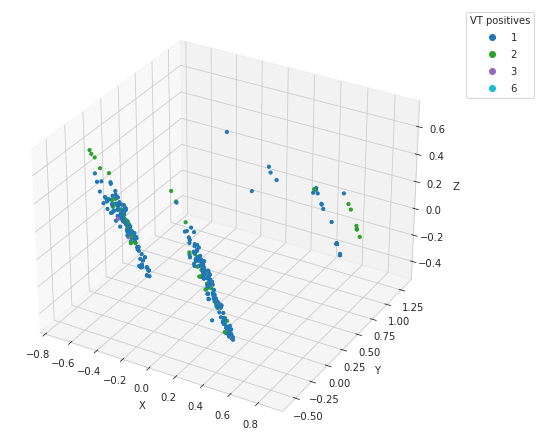

In [27]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


from sklearn.manifold import TSNE

# X_embedded = PCA(n_components=3).fit_transform(cdf.loc[cdf.positives>=0])

X_embedded = PCA(n_components=3).fit_transform(cdf[['suspicious_tld', 'length',
       'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
       ' pdns duration', 'query count', ' #name servers',
       ' #soa domains', ' is soa matching']])

# X_embedded = TSNE(n_components=3,perplexity=3).fit_transform(cdf[['suspicious_tld', 'length',
#        'brand', 'pop_keywords', 'similar', 'minus','num_subdomains',
#        ' pdns duration', 'query count', ' #name servers',
#        ' #soa domains', ' is soa matching']])
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'z':x[0][2],'positives':x[1]},zip(X_embedded,list(df.loc[df.positives>0]['positives'])))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.positives, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="VT positives")
plt.show()

In [28]:
from collections import Counter
from collections import defaultdict as ddict
def viewServer():
    DATA = ddict(list)
    for key,val in Counter(df.loc[df.positives>0].server).items():
        DATA['Server'].append(key)
        DATA['Count'].append(val)
        DATA['percentage from dataset'].append('{}%'.format(int(val)/len(df.loc[df.positives>0].server)*100))
    return pd.DataFrame(DATA)

In [29]:
DATA = viewServer()

In [30]:
DATA.sort_values(by='Count', ascending=False)

,Server,Count,percentage from dataset
3,cloudflare,83,20.95959595959596%
5,nginx,81,20.454545454545457%
1,NaN,77,19.444444444444446%
4,Apache,44,11.11111111111111%
14,openresty,17,4.292929292929292%
13,LiteSpeed,13,3.2828282828282833%
0,Server,7,1.7676767676767675%
16,Sucuri/Cloudproxy,7,1.7676767676767675%
21,Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/1....,6,1.5151515151515151%
8,nginx/1.15.8,6,1.5151515151515151%


In [31]:
# len(df.loc[df.positives>0])/len(df)

In [32]:
# !ls ../data/FULLDF/

In [33]:
# d1 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/dataset_aug_2020_vt.csv')
# d2 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/dataset_sep_2020_vt.csv')
# d = pd.concat([d1,d2])
# print('Domains')
# print("Aug ",d1.loc[d1.positives>0].domain.shape[0])
# print("Aug unique ",d1.loc[d1.positives>0].domain.unique().shape[0])
# print("Sep ",d2.loc[d2.positives>0].domain.shape[0])
# print("Sep uniqe ",d2.loc[d2.positives>0].domain.unique().shape[0])
# print("All ",d.loc[d.positives>0].domain.shape[0])
# print("All uniqe ",d.loc[d.positives>0].domain.unique().shape[0])

In [34]:
# d1 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/dataset_aug_2020_url_vt.csv')
# d2 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/dataset_sep_2020_url_vt.csv')
# d = pd.concat([d1,d2])
# print('URls')
# print("Aug ",d1.loc[d1.positives>0].url.shape[0])
# print("Aug unique ",d1.loc[d1.positives>0].url.unique().shape[0])
# print("Sep ",d2.loc[d2.positives>0].url.shape[0])
# print("Sep uniqe ",d2.loc[d2.positives>0].url.unique().shape[0])
# print("All ",d.loc[d.positives>0].url.shape[0])
# print("All uniqe ",d.loc[d.positives>0].url.unique().shape[0])

In [35]:
# import urllib.request
# from urllib.error import HTTPError
# from tqdm.notebook import tqdm

# df1 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/aug_cluster.csv')
# df2 = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/sep_cluster.csv')
# df =  pd.concat([df1,df2])

# DATA =  list()
# for index, row in tqdm(df.loc[df.positives>0].iterrows()):
#     try:
#         fp = urllib.request.urlopen(row['Final URL'])
#         extURL = fp.geturl()
#         DATA.append(row.append(pd.Series({'unshorten url':extURL})))
#     except:
#          DATA.append(row.append(pd.Series({'unshorten url':row['Final URL']})))
    
# DATA = pd.DataFrame(DATA)

In [36]:
# DATA[['scanned url','Final URL','unshorten url']].head(30)

In [37]:
# DATA.iloc[427][['scanned url','Final URL','unshorten url']]

In [38]:
# DATA.to_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/all_cluster_vt_gt_0.csv')

In [39]:
# for index, row in D.iterrows():
#     if "bit" in row.url:
#         print(row.url)

In [40]:
# from collections import Counter
# data = Counter(df1.loc[df1.positives>0]['scanned url'])
# D = ddict(list)
# for i in data:
#     D['url'].append(i)
#     D['Count'].append(data[i])
# D = pd.DataFrame(D)

In [41]:
# D.shape

In [42]:
# import requests

# session = requests.Session()  # so connections are recycled
# resp = session.head('https://www.linkedin.com/feed/update/urn:li:share:6701209108458086400', allow_redirects=True)
# print(resp.url)

In [53]:
df

,Unnamed: 0,Unnamed: 0.1,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,...,unshorten url,fqdn,firstseen,lastseen,pdns duration,query count,#name servers,is ns matching,#soa domains,is soa matching
0,0,171,amzn.to,https://amzn.to/2vawbWK,83,2,0,2280.0,67.199.248.12,Server,...,https://www.amazon.com/gp/product/?tag=calcula...,www.amazon.com,2010-11-21 04:01:32,2016-11-11 06:29:13,356544826,16,3,True,1,None
1,1,220,lnkd.in,https://lnkd.in/eFHFaRi,83,1,0,42685.0,108.174.10.10,NaN,...,https://www.linkedin.com/feed/update/urn:li:sh...,www.linkedin.com,2019-05-15 22:10:37,2020-10-16 06:37:51,18,1,3,True,1,None
2,2,348,tinyurl.com,http://tinyurl.com/yxnnpj7f,83,1,0,130473.0,104.20.138.65,nginx/1.16.1,...,http://tatar-congress.org/ru/yanalyklar/video-...,tatar-congress.org,2014-11-11 22:49:23,2021-01-11 08:55:32,313687,11,2,True,1,True
3,3,481,arsitios.com,https://arsitios.com/zonafrancatv/2020/08/17/v...,83,2,0,191720.0,104.31.70.181,cloudflare,...,https://arsitios.com/zonafrancatv/2020/08/17/v...,arsitios.com,2016-04-04 02:38:12,2021-01-12 14:04:23,3523,17,4,True,5,True
4,4,524,tinyurl.com,https://tinyurl.com/yyztkhl6,83,1,0,39174.0,104.20.138.65,Apache,...,http://guiaglobal.com.br/2020/08/17/imunologis...,guiaglobal.com.br,2013-10-08 14:43:34,2021-01-12 09:13:48,11614,3,3,True,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed 383,440,14592,ht.ly,http://ht.ly/3yIE30r97y1,83,2,0,38728.0,54.67.62.204,Apache,...,https://www.mexnewz.mx/vacuna-contra-covid-19-...,www.mexnewz.mx,2017-03-20 23:15:41,2018-10-02 05:57:46,1295,2,3,True,3,None
Unnamed 384,441,14658,goo.su,https://goo.su/25hI,83,3,0,77706.0,104.27.168.227,Apache-Coyote/1.1,...,https://www.elsoldemexico.com.mx/mexico/politi...,www.elsoldemexico.com.mx,2011-05-30 04:26:03,2016-10-11 07:55:23,252987,8,3,True,2,None
Unnamed 385,442,14663,owl.li,http://owl.li/dFwu30r98IR,83,1,0,65866.0,54.67.62.204,cloudflare,...,http://purmamarcadiariodigital.com.ar/contenid...,purmamarcadiariodigital.com.ar,2020-03-19 09:28:56,2020-12-27 14:56:50,93,4,2,True,2,None
Unnamed 386,443,14702,cutt.ly,https://cutt.ly/jfT7NnN,83,1,98,44020.0,104.22.0.232,cloudflare,...,https://contraparte.mx/internacionales/41442-v...,contraparte.mx,2014-12-18 07:02:09,2021-01-12 18:40:59,144588,12,4,True,4,None


In [54]:
DF = []
for index, row in df.iterrows():
    DF.append(getFQDN(row['unshorten url']))
# df = pd.DataFrame(DF)

In [55]:
open('input.txt','w').write('\n'.join(DF))

5673